<a href="https://colab.research.google.com/github/mumtazharis/PCVK_MumtazHaris/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from PIL import Image as im
from google.colab.patches import cv2_imshow

In [ ]:
def convolution2d(image, kernel, stride=1, padding=0):
    # Tambahkan padding ke gambar jika diperlukan
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Ukuran output array perlu disesuaikan dengan ukuran hasil konvolusi
    output_height = (image.shape[0] - kernel.shape[0]) // stride + 1
    output_width = (image.shape[1] - kernel.shape[1]) // stride + 1
    output = np.zeros((output_height, output_width))

    # Perulangan untuk menggeser kernel
    for i in range(output_height):
        for j in range(output_width):
            conv = 0  # Reset nilai konvolusi setiap kali kernel dipindahkan
            # Mengambil bagian gambar yang sesuai dengan ukuran kernel
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    # Posisi pada gambar dengan pergeseran `i`, `j`, `stride`, dan padding
                    x = i * stride + k
                    y = j * stride + l
                    if x < image.shape[0] and y < image.shape[1]:  # Pastikan dalam batas
                      conv += kernel[k, l] * image[x, y]
            output[i, j] = np.clip(conv, 0,255)  # Simpan hasil konvolusi

    return output


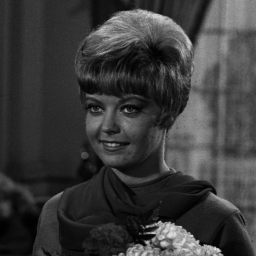

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

In [ ]:
kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

kernel_emboss = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])

kernel_leftsobeledgedetection = np.array([[1, 0, -1],
                                          [2, 0, -2],
                                          [1, 0, -1]])

kernel_cannyedgedetection = np.array([[-1, -1, -1],
                                      [-1, 8, -1],
                                      [-1, -1, -1]])

kernel_prewittedgedetection = np.array([[-1, -1, -1],
                                        [0, 0, 0],
                                        [1, 1, 1]])

kernel_gaussian_blur = np.array([[1,  4,  6,  4,  1],
                                 [4, 16, 24, 16,  4],
                                 [7, 26, 36, 26,  7],
                                 [4, 16, 24, 16,  4],
                                 [1,  4,  6,  4,  1]])
kernel_gaussian_blur = kernel_gaussian_blur / 256

kernel_size=21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()


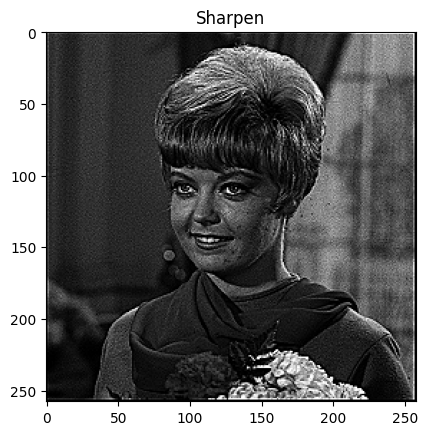

In [ ]:
plt.title('Sharpen')
plt.imshow(convolution2d(img_gray,kernel_sharpen,1,2), cmap='gray')

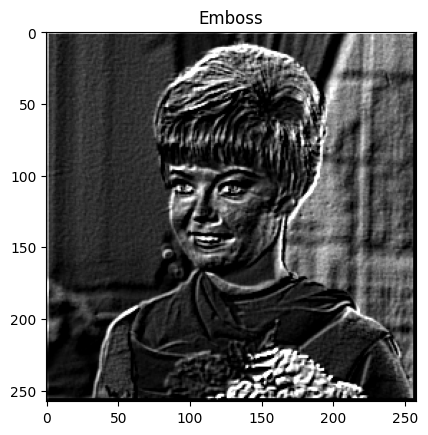

In [ ]:
plt.title('Emboss')
plt.imshow(convolution2d(img_gray,kernel_emboss,1,2), cmap='gray')

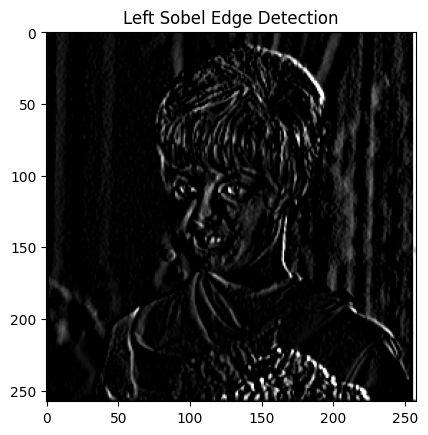

In [ ]:
plt.title('Left Sobel Edge Detection')
plt.imshow(convolution2d(img_gray,kernel_leftsobeledgedetection,1,2), cmap='gray')

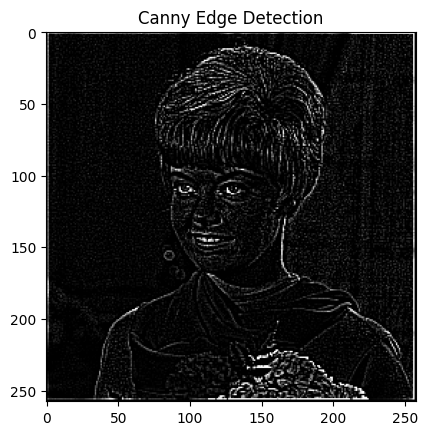

In [ ]:
plt.title('Canny Edge Detection')
plt.imshow(convolution2d(img_gray,kernel_cannyedgedetection,1,2), cmap='gray')

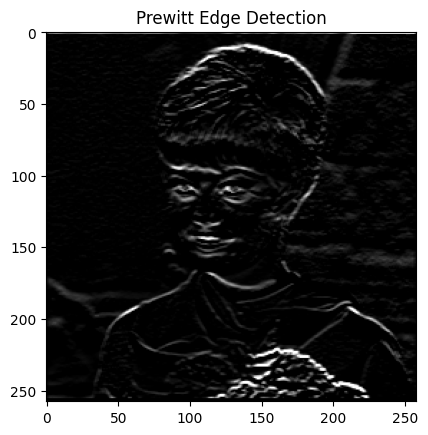

In [ ]:
plt.title('Prewitt Edge Detection')
plt.imshow(convolution2d(img_gray,kernel_prewittedgedetection,1,2), cmap='gray')

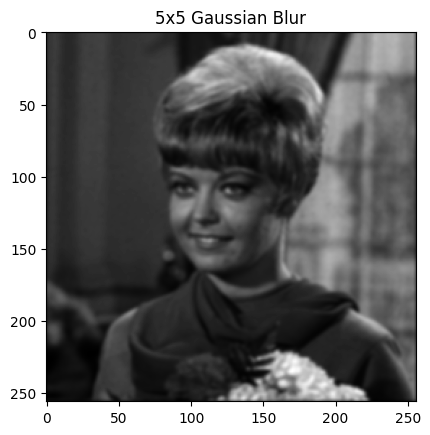

In [ ]:
plt.title('5x5 Gaussian Blur')
plt.imshow(convolution2d(img_gray,kernel_gaussian_blur,1,2), cmap='gray')

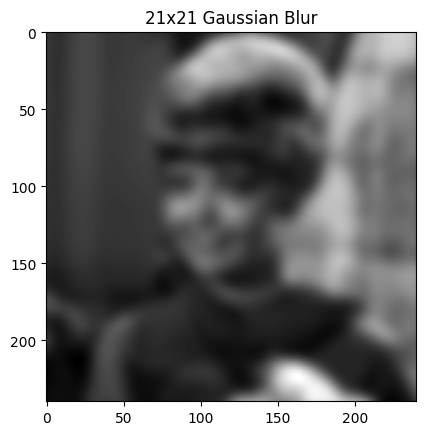

In [ ]:
plt.title('21x21 Gaussian Blur')
plt.imshow(convolution2d(img_gray,gauss_kernel,1,2), cmap='gray')